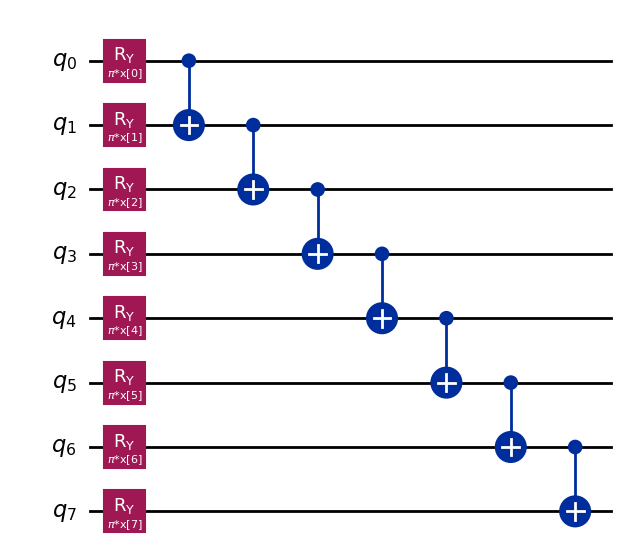

In [11]:
# from ansatz_library_new import UnaryEncoder
from ionqvision.ansatze.ansatz_library import AngleEncoder

num_qubits = 8 # number of qubits
encoder = AngleEncoder(num_qubits) #sets up number of qubits
encoder.draw("mpl")

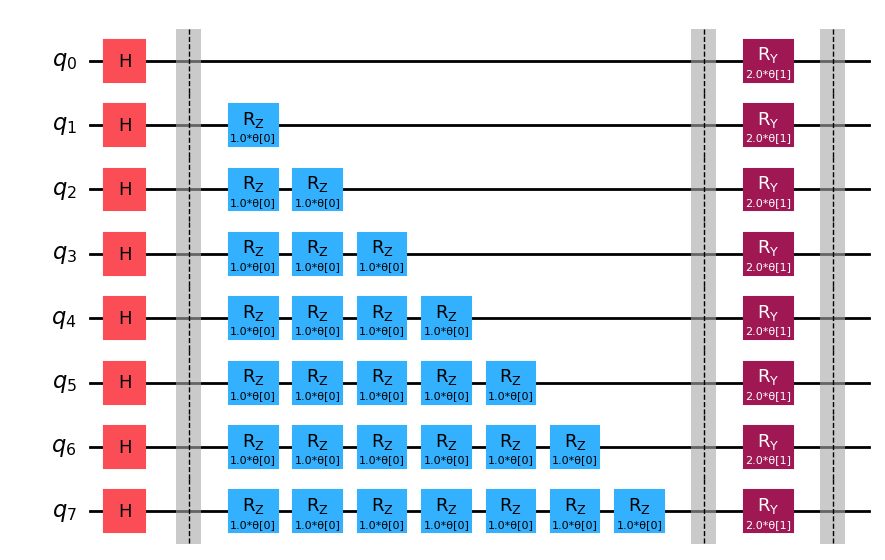

In [12]:
from ionqvision import ansatz_library
from qiskit.quantum_info import SparsePauliOp
# Cost = Summation of 1/2 (1 - ZiZj)
# ZiZj = qubits denoted at one with i and j index represented by Z
# if i = 0 and j = 0; IIIIIIZZ 
# NOTICE: I have done this part incorrectly
# To plug in the formula, I should have gotten the summation of 1 (Identity) minus ZiZj times 0.5
# This is also an invalid way to solve the problem so it uses formula for the Max-Cut Problem

tuples_list = [] # List of all Pauli Operations

for i in range (num_qubits): # Finds every permutation of i and j
    for j in range (i + 1, num_qubits): # Don't want to repeat so starts at i + 1
        temp = "I" * num_qubits # Identity matrix represented as a sparsed pauli operation
        temp = temp[:i] + 'Z' + temp[i + 1:] # replaces index i with 'Z'
        temp = temp[:i] + 'Z' + temp[i + 1:] # replaces index j with 'Z'
        tuples_list.append((temp, 0.5)) # Makes a list of Hamiltonian operations with coef 0.5
        
H = SparsePauliOp.from_list(tuples_list) # All  Hamiltonian values
ansatz = ansatz_library.QAOAAnsatz(H,multi_angle=False, depth=1, rot="Y")
ansatz.draw("mpl")

In [13]:
from ionqvision import ansatz_library
from qiskit.quantum_info import SparsePauliOp

# Measure the expectation value of X_0, Y_0, Z_0
quantum_features = [
    SparsePauliOp([(num_qubits - 1) * "I" + "X"]), 
    SparsePauliOp([(num_qubits - 1) * "I" + "Y"]), 
    SparsePauliOp([(num_qubits - 1) * "I" + "Z"])
]

In [14]:
from ionqvision.modules import BinaryMNISTClassifier
classifier = BinaryMNISTClassifier(encoder, ansatz, quantum_features); classifier

BinaryMNISTClassifier(
  (latent_vec_encoder): Sequential(
    (0): Linear(in_features=168, out_features=8, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): Sigmoid()
  )
  (quantum_layer): QuantumModule()
  (prediction_head): Sequential(
    (0): Linear(in_features=3, out_features=1, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): Sigmoid()
  )
)

In [15]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

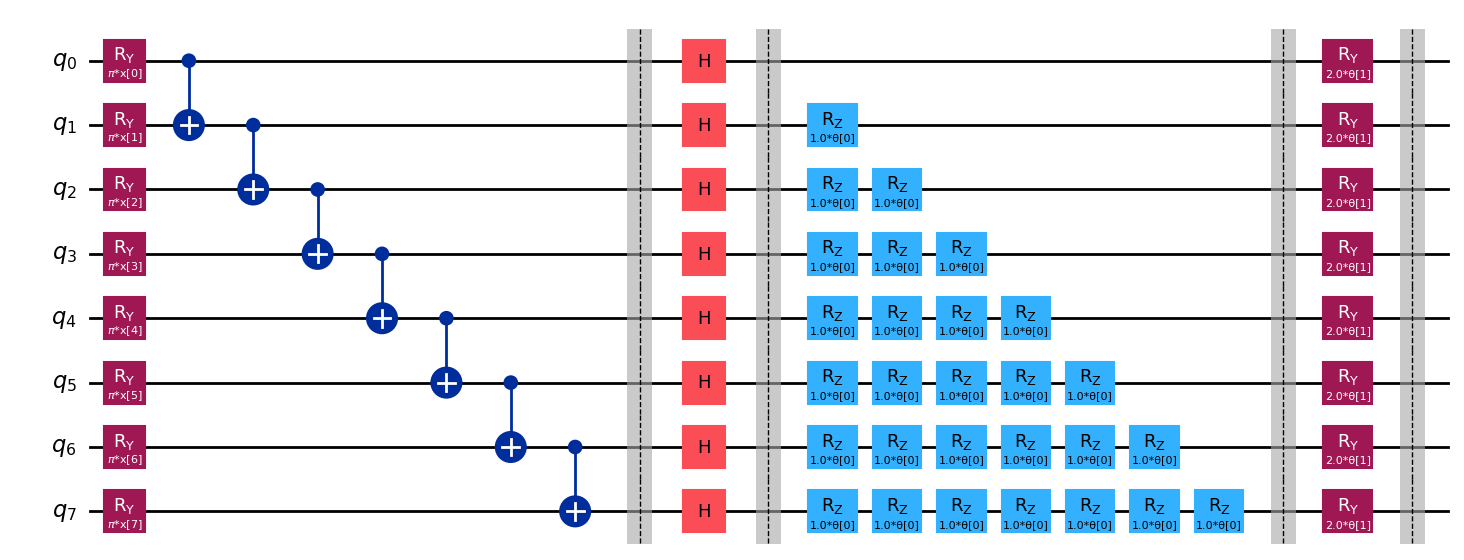

In [16]:
# Check out your quantum layer
classifier.quantum_layer.layer_qc.draw("mpl")

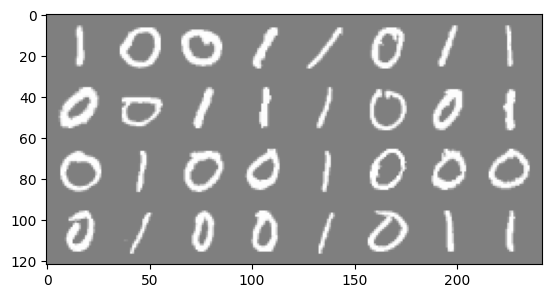

In [17]:
# Verify the images loaded correctly
classifier.visualize_batch()

In [ ]:
%%time
# Get a (pre-processed) training and test set
train_set, test_set = classifier.get_train_test_set(train_size=300, test_size=100)

# Configure model training hyper parameters
config = {
    "epochs": 5,
    "lr": 0.1,
    "batch_size": 50,
    "betas": (0.9, 0.99),
    "weight_decay": 1e-3,
    "clip_grad": True,
    "log_interval": 6,
}

# Train and plot the results
classifier.train_module(train_set, test_set, config)
classifier.plot_training_progress()

In [ ]:
from qbraid.runtime import QbraidSession
from ionqvision.scq_client import IonQSCQClient

session = QbraidSession()
client = IonQSCQClient(session = session)

In [ ]:
submission_data = classifier.submit_model_for_grading(client=client) 
message = submission_data.get("message")
submission_id = submission_data.get("submissionID") 
print(message) 
client.await_autograder_result(submission_id=submission_id)